In [6]:
import numpy as np
import pandas as pd

import string
import importlib

import russia_df_utils
importlib.reload(russia_df_utils)
from russia_df_utils import get_uncategorized_df_rows

import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models, similarities, matutils
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score

from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()

%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [35]:
clustered_tweets = get_uncategorized_df_rows(drop_retweets=True)
clustering_text = clustered_tweets['processed_text']

stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.remove('all')
tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df=10, max_df=0.8)
vectorized_tweets = tfidf.fit_transform(clustering_text.values)

In [36]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
svd.fit(vectorized_tweets)  


#print(svd.explained_variance_ratio_)  

print(svd.explained_variance_ratio_.sum())  

0.09563959751357196


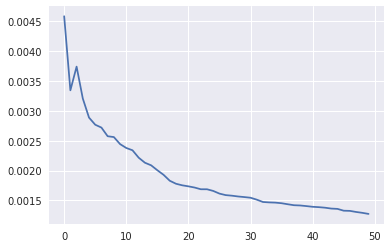

In [37]:
plt.plot(svd.explained_variance_ratio_)

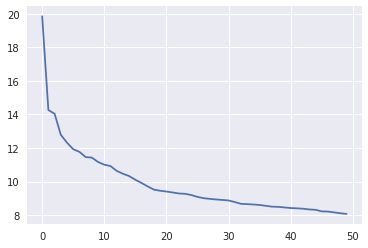

In [38]:
plt.plot(svd.singular_values_)